### Homework 2
### Discrete isoperimetries
_Student: Viktoriia Oliinyk_
### Part II. Exercises to code
__Question 4.__

First, we complete the following steps:

Reading file in a string -> creating a flat list of neigboring vertices -> creating a list of tuples = edges -> creating an adjacency matrix

In [404]:
# Reading the file 
from urllib.request import urlopen
response = urlopen("http://monge.univ-mlv.fr/~goaoc/test1.txt")
myfile = response.read().decode('UTF-8')
myfile = myfile.replace(',', ' ')

# Storing sequence of pairs of adjacent vertices in a flat list
adj_vertices = list(map(int, myfile.split()))
n = max(adj_vertices)

In [405]:
# Creating list of tuples of edges
def create_edges(adj_vertices):
    m = len(adj_vertices)//2
    edges = list(zip(adj_vertices[0:(2 * m):2], adj_vertices[1:(2 * m):2]))
    return edges

In [406]:
create_edges(adj_vertices)

[(1, 2), (2, 3), (3, 4), (4, 5), (5, 1), (4, 1), (2, 4)]

In [407]:
# Creating adjacency matrix
def create_adj_matrix(n, edges):
    adj = [[0] * n for i in range(n)]
    for i, j in edges:
        adj[i-1][j-1] = 1
        adj[j-1][i-1] = 1
    return adj

In [408]:
create_adj_matrix(n, edges)

[[0, 1, 0, 1, 1],
 [1, 0, 1, 1, 0],
 [0, 1, 0, 1, 0],
 [1, 1, 1, 0, 1],
 [1, 0, 0, 1, 0]]

Next, in order to calculate eigenvalues and eigenvectors, we use _QR-method_.

Consider QR-factorization of the matrix $A$, $A = QR$ where $Q^TQ = I$ and $R$ is upper triangular.

We will now reverse the order of multiplication product of $Q$ and $R$ and eliminate $R$, $$RQ = Q^T AQ.$$
Since $Q^T AQ$ is a similarity transformation of $A$, $RQ$ has the same eigenvalues as $A.$

Moreover, through iteration of this process, the matrix $RQ$ becomes closer and closer to upper triangular, such that eventually __the eigenvalues appear at the diagonal__. That is, the QR-method generates a sequence of matrices $A_k$ initiated with $A_0 = A$ and given by
$$A_k = R_kQ_k,$$
where $Q_k$ and $R_k$ represents a QR-factorization of $A_{k−1}$,
$$A_{k−1} = Q_k R_k.$$

Finally, __the eigenvectors__ magically apppear as __the columns of product of the sequence of $Q_k$__ matrices obtained through iteration process.

In [409]:
import numpy as np

In [410]:
# Calculating eigenvalues and eigenvectors using QR decomposition method
def QR_eig(n, A):
    Q_prod = np.eye(n)
    for i in np.arange(1000):
        Q, R = LA.qr(A)
        A = np.dot(R,Q)
        Q_prod = np.dot(Q_prod, Q)
    eig_values_qr = np.diag(A)
    idx = eig_values_qr.argsort()[::-1]
    eig_values_qr = eig_values_qr[idx]
    eig_vectors_qr = Q_prod[:,idx]
    return eig_values_qr, eig_vectors_qr

In [411]:
eig_values_qr, eig_vectors_qr = QR_eig(n, adj)
eig_values_qr

array([ 2.93543233,  0.61803399, -0.46259842, -1.47283391, -1.61803399])

In [412]:
for i in range(n):
    print(eig_vectors_qr[:,i])

[ 0.46995928  0.46995928  0.35054183  0.55903255  0.35054183]
[ -3.71748034e-01   3.71748034e-01   6.01500955e-01  -7.15232884e-17
  -6.01500955e-01]
[ 0.51003631  0.51003631 -0.43904224 -0.30693606 -0.43904224]
[-0.13784497 -0.13784497 -0.42937435  0.77024208 -0.42937435]
[ -6.01500955e-01   6.01500955e-01  -3.71748034e-01   7.68844071e-16
   3.71748034e-01]


In [413]:
# Sanity check
# Calculating eigenvalues and eigenvectors using linalg numpy library
from numpy import linalg as LA
eig_values, eig_vectors =  LA.eig(adj)
idx = eig_values.argsort()[::-1]
eig_values = eig_values[idx]
eig_vectors = eig_vectors[:,idx]

In [414]:
eig_values

array([ 2.93543233,  0.61803399, -0.46259842, -1.47283391, -1.61803399])

In [415]:
for i in range(n):
    print(eig_vectors[:,i])

[-0.46995928 -0.46995928 -0.35054183 -0.55903255 -0.35054183]
[ -3.71748034e-01   3.71748034e-01   6.01500955e-01   9.20386909e-17
  -6.01500955e-01]
[ 0.51003631  0.51003631 -0.43904224 -0.30693606 -0.43904224]
[ 0.13784497  0.13784497  0.42937435 -0.77024208  0.42937435]
[ -6.01500955e-01   6.01500955e-01  -3.71748034e-01  -2.36627147e-16
   3.71748034e-01]


Perfect. QR decomposition method gives a very nice accuracy. Notice we don't care about the sign of the obtained eigenvectors.

__Question 5.__

Consider the following graphs each of 8 vertices : 
- a path, 
- a cycle, 
- a complete graph,
- a hypercube 
- some other graph of your choice. 

Label the vertices $\{1, 2 . . . 8\}$ and let $f_j$ be the eigenvector corresponding to the $j$-th eigenvalue of the laplacian matrix. For each of these graphs we do the following exercies.

For each eigenvector $j \in \{1,2,3...8\}$ we plot the points $(i,fj(i))$ in $R^2$, where $i \in \{1,2...8\}$ and connect neighboring vertices.

Recall, laplacian matrix is defined as:
$$L = D - A,$$
where $D$ is a degree matrix and $A$ is an adjacency matrix. So, we need to calculate degree matrices of graphs.

In [416]:
# Creating the degree matrix given an adjacency matrix
def create_degree_matrix(adj_matrix):
    return np.diag(np.sum(adj_matrix, axis = 1))

#### Path

In [417]:
path_adj_vertices = []
n = 8
for i in range(n-1):
    path_adj_vertices.append(i+1)
    path_adj_vertices.append(i+2)
path_adj_vertices

[1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8]

In [418]:
edges_path = create_edges(path_adj_vertices)
print(edges_path)
adj_path = create_adj_matrix(n, edges_path)
adj_path

[(1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 8)]


[[0, 1, 0, 0, 0, 0, 0, 0],
 [1, 0, 1, 0, 0, 0, 0, 0],
 [0, 1, 0, 1, 0, 0, 0, 0],
 [0, 0, 1, 0, 1, 0, 0, 0],
 [0, 0, 0, 1, 0, 1, 0, 0],
 [0, 0, 0, 0, 1, 0, 1, 0],
 [0, 0, 0, 0, 0, 1, 0, 1],
 [0, 0, 0, 0, 0, 0, 1, 0]]

In [419]:
degree_path = create_degree_matrix(adj_path)
degree_path

array([[1, 0, 0, 0, 0, 0, 0, 0],
       [0, 2, 0, 0, 0, 0, 0, 0],
       [0, 0, 2, 0, 0, 0, 0, 0],
       [0, 0, 0, 2, 0, 0, 0, 0],
       [0, 0, 0, 0, 2, 0, 0, 0],
       [0, 0, 0, 0, 0, 2, 0, 0],
       [0, 0, 0, 0, 0, 0, 2, 0],
       [0, 0, 0, 0, 0, 0, 0, 1]])

In [420]:
lapl_path = degree_path - adj_path
lapl_path

array([[ 1, -1,  0,  0,  0,  0,  0,  0],
       [-1,  2, -1,  0,  0,  0,  0,  0],
       [ 0, -1,  2, -1,  0,  0,  0,  0],
       [ 0,  0, -1,  2, -1,  0,  0,  0],
       [ 0,  0,  0, -1,  2, -1,  0,  0],
       [ 0,  0,  0,  0, -1,  2, -1,  0],
       [ 0,  0,  0,  0,  0, -1,  2, -1],
       [ 0,  0,  0,  0,  0,  0, -1,  1]])

In [421]:
eig_values_path, eig_vectors_path = QR_eig(n, lapl_path)

In [422]:
import matplotlib.pyplot as plt

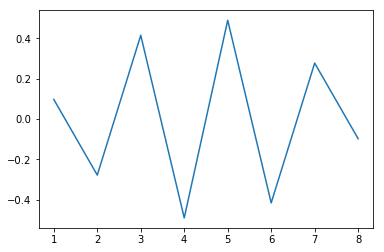

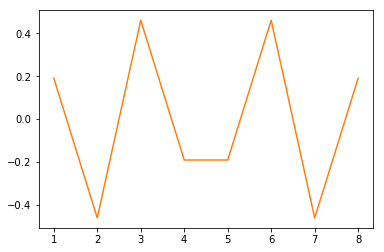

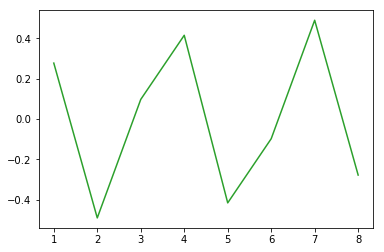

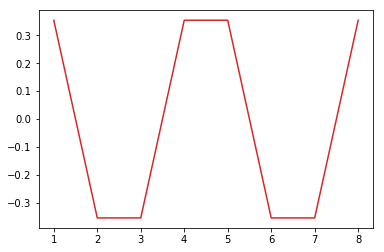

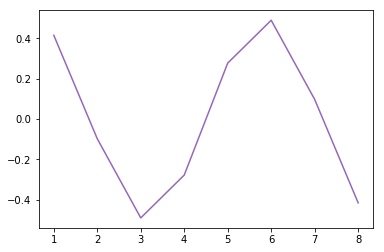

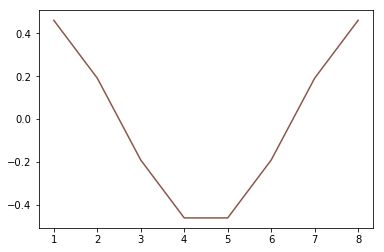

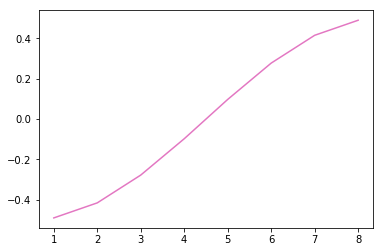

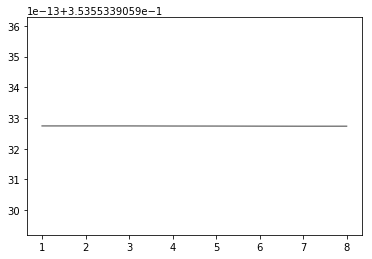

In [423]:
colours=['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7']
for i in range(n):
    plt.plot(range(1,n+1), eig_vectors_path[:,i], '-', color = colours[i])
    plt.show()

#### I know this guy! Hello, Fourier basis!!!

#### Cycle

In [424]:
cycle_adj_vertices = []
n = 8
for i in range(n-1):
    cycle_adj_vertices.append(i+1)
    cycle_adj_vertices.append(i+2)
cycle_adj_vertices.append(n)
cycle_adj_vertices.append(1)
cycle_adj_vertices

[1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8, 8, 1]

In [425]:
edges_cycle = create_edges(cycle_adj_vertices)
print(edges_cycle)
adj_cycle = create_adj_matrix(n, edges_cycle)
adj_cycle

[(1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 8), (8, 1)]


[[0, 1, 0, 0, 0, 0, 0, 1],
 [1, 0, 1, 0, 0, 0, 0, 0],
 [0, 1, 0, 1, 0, 0, 0, 0],
 [0, 0, 1, 0, 1, 0, 0, 0],
 [0, 0, 0, 1, 0, 1, 0, 0],
 [0, 0, 0, 0, 1, 0, 1, 0],
 [0, 0, 0, 0, 0, 1, 0, 1],
 [1, 0, 0, 0, 0, 0, 1, 0]]

In [426]:
degree_cycle = create_degree_matrix(adj_cycle)
degree_cycle

array([[2, 0, 0, 0, 0, 0, 0, 0],
       [0, 2, 0, 0, 0, 0, 0, 0],
       [0, 0, 2, 0, 0, 0, 0, 0],
       [0, 0, 0, 2, 0, 0, 0, 0],
       [0, 0, 0, 0, 2, 0, 0, 0],
       [0, 0, 0, 0, 0, 2, 0, 0],
       [0, 0, 0, 0, 0, 0, 2, 0],
       [0, 0, 0, 0, 0, 0, 0, 2]])

In [427]:
lapl_cycle = degree_cycle - adj_cycle
lapl_cycle

array([[ 2, -1,  0,  0,  0,  0,  0, -1],
       [-1,  2, -1,  0,  0,  0,  0,  0],
       [ 0, -1,  2, -1,  0,  0,  0,  0],
       [ 0,  0, -1,  2, -1,  0,  0,  0],
       [ 0,  0,  0, -1,  2, -1,  0,  0],
       [ 0,  0,  0,  0, -1,  2, -1,  0],
       [ 0,  0,  0,  0,  0, -1,  2, -1],
       [-1,  0,  0,  0,  0,  0, -1,  2]])

In [428]:
eig_values_cycle, eig_vectors_cycle = QR_eig(n, lapl_cycle)

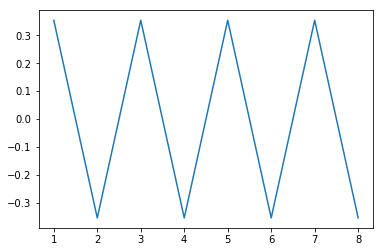

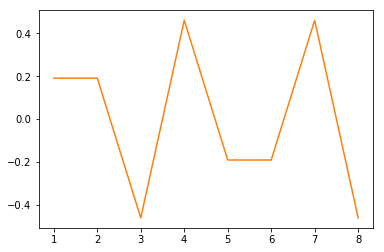

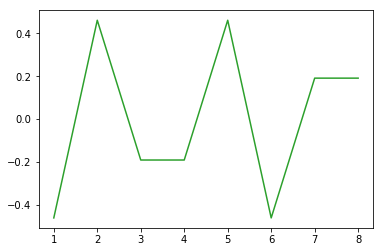

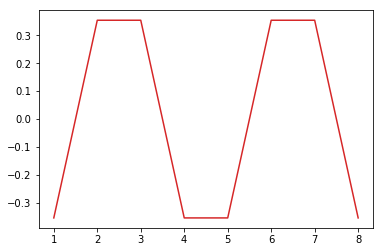

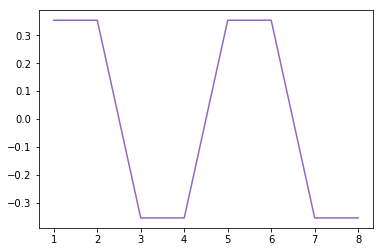

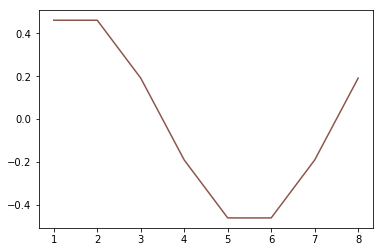

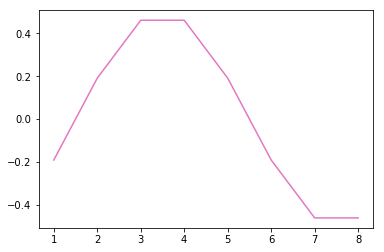

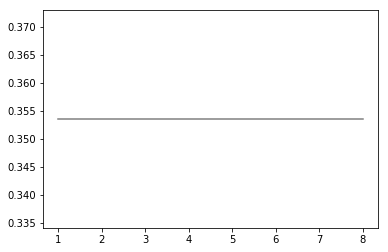

In [429]:
for i in range(n):
    plt.plot(range(1,n+1), eig_vectors_cycle[:,i], '-', color = 'C'+ str(i))
    plt.show()

#### Complete graph

In [430]:
complete_adj_vertices = []
n = 8
for i in range(n):
    for j in range(i):
        complete_adj_vertices.append(i+1)
        complete_adj_vertices.append(j+1)

In [431]:
edges_complete = create_edges(complete_adj_vertices)
print(edges_complete)
adj_complete = create_adj_matrix(n, edges_complete)
adj_complete

[(2, 1), (3, 1), (3, 2), (4, 1), (4, 2), (4, 3), (5, 1), (5, 2), (5, 3), (5, 4), (6, 1), (6, 2), (6, 3), (6, 4), (6, 5), (7, 1), (7, 2), (7, 3), (7, 4), (7, 5), (7, 6), (8, 1), (8, 2), (8, 3), (8, 4), (8, 5), (8, 6), (8, 7)]


[[0, 1, 1, 1, 1, 1, 1, 1],
 [1, 0, 1, 1, 1, 1, 1, 1],
 [1, 1, 0, 1, 1, 1, 1, 1],
 [1, 1, 1, 0, 1, 1, 1, 1],
 [1, 1, 1, 1, 0, 1, 1, 1],
 [1, 1, 1, 1, 1, 0, 1, 1],
 [1, 1, 1, 1, 1, 1, 0, 1],
 [1, 1, 1, 1, 1, 1, 1, 0]]

In [432]:
degree_complete = create_degree_matrix(adj_complete)
degree_complete

array([[7, 0, 0, 0, 0, 0, 0, 0],
       [0, 7, 0, 0, 0, 0, 0, 0],
       [0, 0, 7, 0, 0, 0, 0, 0],
       [0, 0, 0, 7, 0, 0, 0, 0],
       [0, 0, 0, 0, 7, 0, 0, 0],
       [0, 0, 0, 0, 0, 7, 0, 0],
       [0, 0, 0, 0, 0, 0, 7, 0],
       [0, 0, 0, 0, 0, 0, 0, 7]])

In [433]:
lapl_complete = degree_complete - adj_complete
lapl_complete

array([[ 7, -1, -1, -1, -1, -1, -1, -1],
       [-1,  7, -1, -1, -1, -1, -1, -1],
       [-1, -1,  7, -1, -1, -1, -1, -1],
       [-1, -1, -1,  7, -1, -1, -1, -1],
       [-1, -1, -1, -1,  7, -1, -1, -1],
       [-1, -1, -1, -1, -1,  7, -1, -1],
       [-1, -1, -1, -1, -1, -1,  7, -1],
       [-1, -1, -1, -1, -1, -1, -1,  7]])

In [434]:
eig_values_complete, eig_vectors_complete = QR_eig(n, lapl_complete)

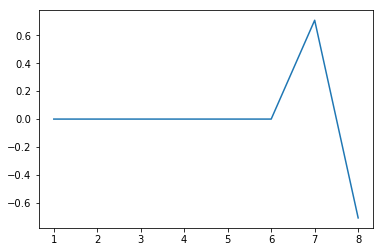

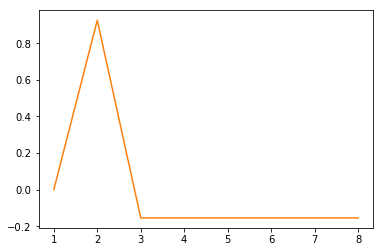

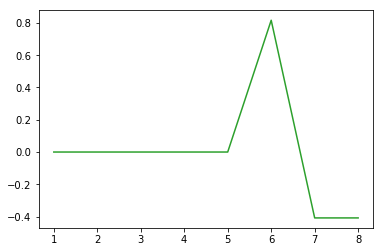

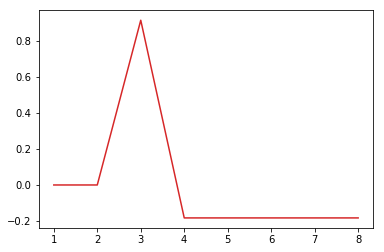

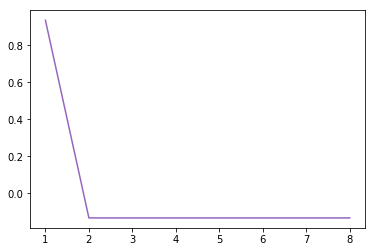

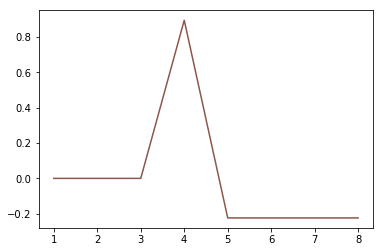

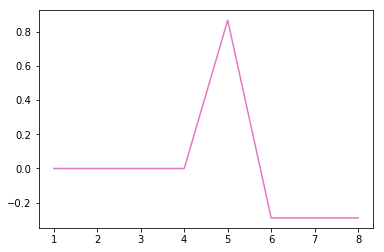

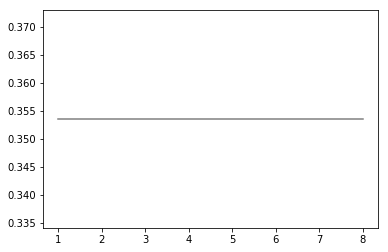

In [435]:
for i in range(n):
    plt.plot(range(1,n+1), eig_vectors_complete[:,i], '-', color = 'C'+ str(i))
    plt.show()

#### Hypercube

In [436]:
hcube_adj_vertices = [1, 2, 2, 3, 3, 4, 4, 1, 5, 6, 6, 7, 7, 8, 8, 5, 1, 5, 2, 6, 3, 7, 4, 8]
edges_hcube = create_edges(hcube_adj_vertices)
print(edges_hcube)
adj_hcube = create_adj_matrix(n, edges_hcube)
adj_hcube

[(1, 2), (2, 3), (3, 4), (4, 1), (5, 6), (6, 7), (7, 8), (8, 5), (1, 5), (2, 6), (3, 7), (4, 8)]


[[0, 1, 0, 1, 1, 0, 0, 0],
 [1, 0, 1, 0, 0, 1, 0, 0],
 [0, 1, 0, 1, 0, 0, 1, 0],
 [1, 0, 1, 0, 0, 0, 0, 1],
 [1, 0, 0, 0, 0, 1, 0, 1],
 [0, 1, 0, 0, 1, 0, 1, 0],
 [0, 0, 1, 0, 0, 1, 0, 1],
 [0, 0, 0, 1, 1, 0, 1, 0]]

In [437]:
degree_hcube = create_degree_matrix(adj_hcube)
degree_hcube

array([[3, 0, 0, 0, 0, 0, 0, 0],
       [0, 3, 0, 0, 0, 0, 0, 0],
       [0, 0, 3, 0, 0, 0, 0, 0],
       [0, 0, 0, 3, 0, 0, 0, 0],
       [0, 0, 0, 0, 3, 0, 0, 0],
       [0, 0, 0, 0, 0, 3, 0, 0],
       [0, 0, 0, 0, 0, 0, 3, 0],
       [0, 0, 0, 0, 0, 0, 0, 3]])

In [438]:
lapl_hcube = degree_hcube - adj_hcube
lapl_hcube

array([[ 3, -1,  0, -1, -1,  0,  0,  0],
       [-1,  3, -1,  0,  0, -1,  0,  0],
       [ 0, -1,  3, -1,  0,  0, -1,  0],
       [-1,  0, -1,  3,  0,  0,  0, -1],
       [-1,  0,  0,  0,  3, -1,  0, -1],
       [ 0, -1,  0,  0, -1,  3, -1,  0],
       [ 0,  0, -1,  0,  0, -1,  3, -1],
       [ 0,  0,  0, -1, -1,  0, -1,  3]])

In [439]:
eig_values_hcube, eig_vectors_hcube = QR_eig(n, lapl_hcube)

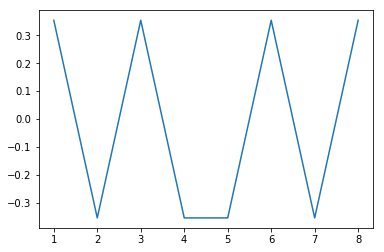

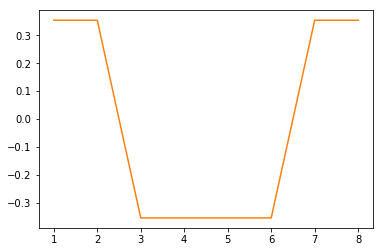

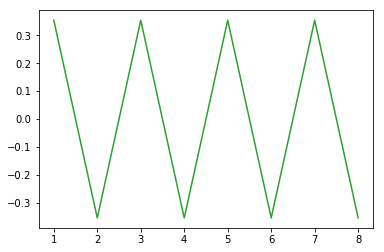

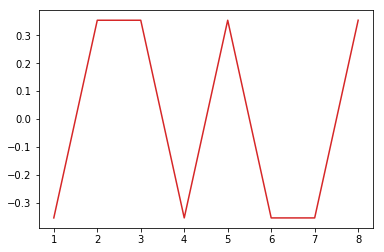

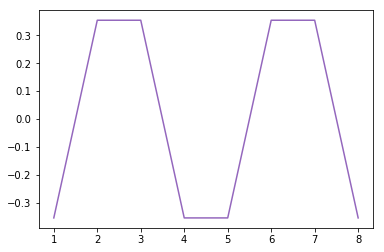

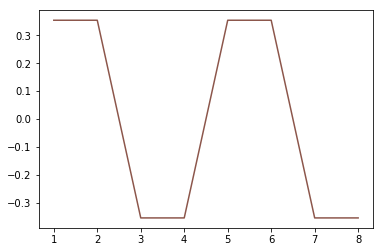

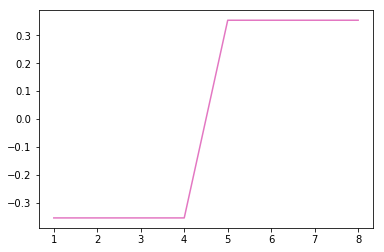

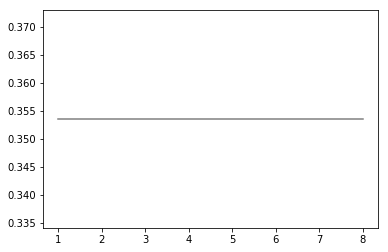

In [440]:
for i in range(n):
    plt.plot(range(1,n+1), eig_vectors_hcube[:,i], '-', color = 'C'+ str(i))
    plt.show()

#### My choice: Star

![title](star.png)

In [451]:
star_adj_vertices = []
n = 8
for i in range(n-1):
    star_adj_vertices.append(i+1)
    star_adj_vertices.append(n)
edges_star = create_edges(star_adj_vertices)
print(edges_star)
adj_star = create_adj_matrix(n, edges_star)
adj_star

[(1, 8), (2, 8), (3, 8), (4, 8), (5, 8), (6, 8), (7, 8)]


[[0, 0, 0, 0, 0, 0, 0, 1],
 [0, 0, 0, 0, 0, 0, 0, 1],
 [0, 0, 0, 0, 0, 0, 0, 1],
 [0, 0, 0, 0, 0, 0, 0, 1],
 [0, 0, 0, 0, 0, 0, 0, 1],
 [0, 0, 0, 0, 0, 0, 0, 1],
 [0, 0, 0, 0, 0, 0, 0, 1],
 [1, 1, 1, 1, 1, 1, 1, 0]]

In [452]:
degree_star = create_degree_matrix(adj_star)
degree_star

array([[1, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 7]])

In [453]:
lapl_star = degree_star - adj_star
lapl_star

array([[ 1,  0,  0,  0,  0,  0,  0, -1],
       [ 0,  1,  0,  0,  0,  0,  0, -1],
       [ 0,  0,  1,  0,  0,  0,  0, -1],
       [ 0,  0,  0,  1,  0,  0,  0, -1],
       [ 0,  0,  0,  0,  1,  0,  0, -1],
       [ 0,  0,  0,  0,  0,  1,  0, -1],
       [ 0,  0,  0,  0,  0,  0,  1, -1],
       [-1, -1, -1, -1, -1, -1, -1,  7]])

In [454]:
eig_values_star, eig_vectors_star = QR_eig(n, lapl_star)

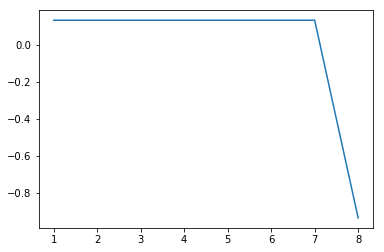

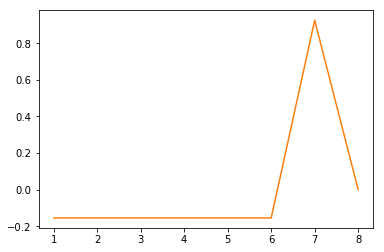

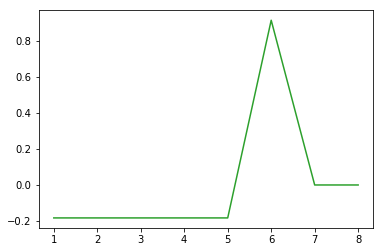

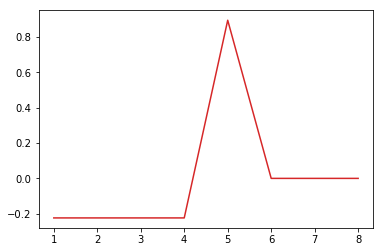

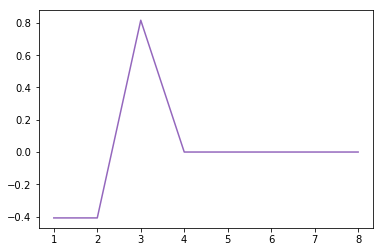

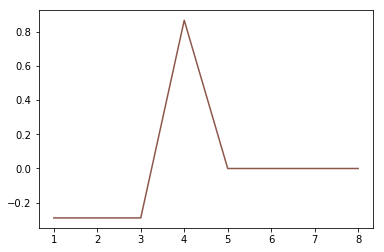

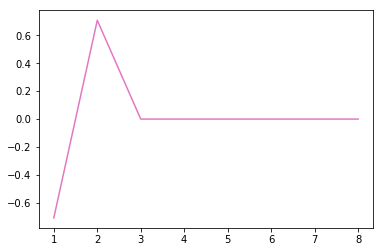

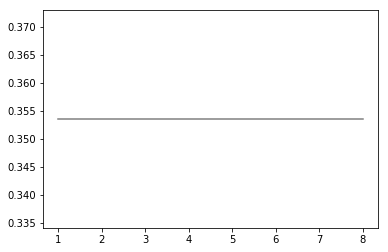

In [455]:
for i in range(n):
    plt.plot(range(1,n+1), eig_vectors_star[:,i], '-', color = 'C'+ str(i))
    plt.show()

- We plot $(f2(i),f3(i))$ in $R^2$ and connect neighboring vertices.
#### Path

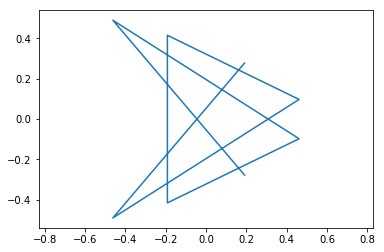

In [352]:
plt.plot(eig_vectors_path[:,1], eig_vectors_path[:,2], '-')
plt.axis('equal')
plt.show()

#### Cycle

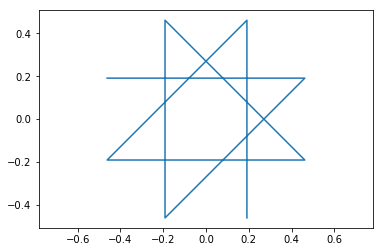

In [353]:
plt.plot(eig_vectors_cycle[:,1], eig_vectors_cycle[:,2], '-')
plt.axis('equal')
plt.show()

#### Complete graph

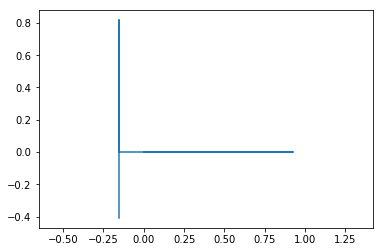

In [354]:
plt.plot(eig_vectors_complete[:,1], eig_vectors_complete[:,2], '-')
plt.axis('equal')
plt.show()

#### Hypercube

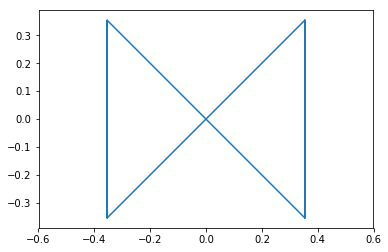

In [355]:
plt.plot(eig_vectors_hcube[:,1], eig_vectors_hcube[:,2], '-')
plt.axis('equal')
plt.show()

#### Star

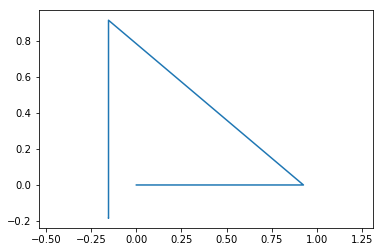

In [456]:
plt.plot(eig_vectors_star[:,1], eig_vectors_star[:,2], '-')
plt.axis('equal')
plt.show()

- We make a two-dimensional depiction of the three-dimensional picture we get if saw a drawing of $(f2(i),f3(i),f4(i))$ and connect neighboring vertices in $R^3$.
#### Path

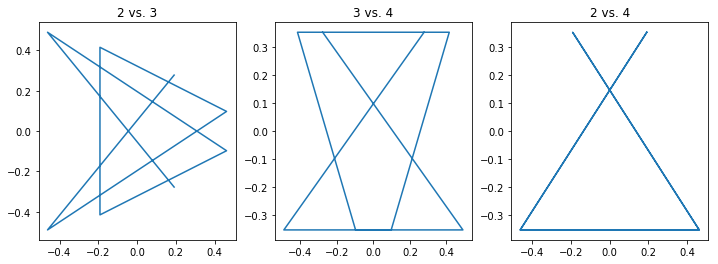

In [384]:
plt.figure(figsize=(12,4))
plt.subplot(1, 3, 1)
plt.plot(eig_vectors_path[:,1], eig_vectors_path[:,2], '-')
plt.title('2 vs. 3')
plt.subplot(1, 3, 2)
plt.plot(eig_vectors_path[:,2], eig_vectors_path[:,3], '-')
plt.title('3 vs. 4')
plt.subplot(1, 3, 3)
plt.plot(eig_vectors_path[:,1], eig_vectors_path[:,3], '-')
plt.title('2 vs. 4')
plt.show()


#### Cycle

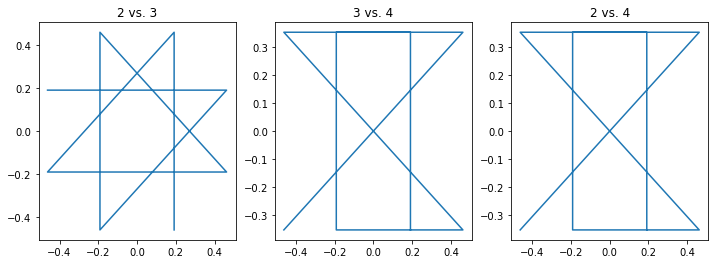

In [385]:
plt.figure(figsize=(12,4))
plt.subplot(1, 3, 1)
plt.plot(eig_vectors_cycle[:,1], eig_vectors_cycle[:,2], '-')
plt.title('2 vs. 3')
plt.subplot(1, 3, 2)
plt.plot(eig_vectors_cycle[:,2], eig_vectors_cycle[:,3], '-')
plt.title('3 vs. 4')
plt.subplot(1, 3, 3)
plt.plot(eig_vectors_cycle[:,1], eig_vectors_cycle[:,3], '-')
plt.title('2 vs. 4')
plt.show()

#### Complete graph

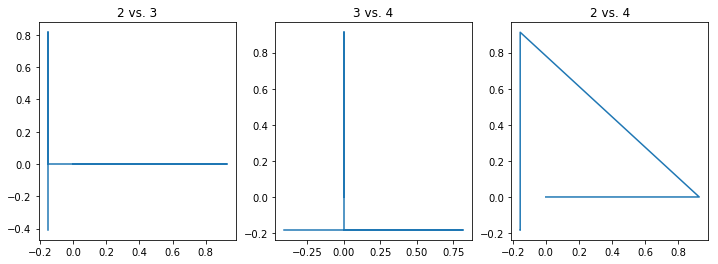

In [386]:
plt.figure(figsize=(12,4))
plt.subplot(1, 3, 1)
plt.plot(eig_vectors_complete[:,1], eig_vectors_complete[:,2], '-')
plt.title('2 vs. 3')
plt.subplot(1, 3, 2)
plt.plot(eig_vectors_complete[:,2], eig_vectors_complete[:,3], '-')
plt.title('3 vs. 4')
plt.subplot(1, 3, 3)
plt.plot(eig_vectors_complete[:,1], eig_vectors_complete[:,3], '-')
plt.title('2 vs. 4')
plt.show()

#### Hypercube

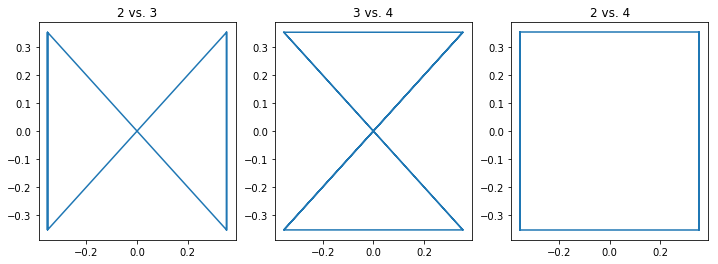

In [387]:
plt.figure(figsize=(12,4))
plt.subplot(1, 3, 1)
plt.plot(eig_vectors_hcube[:,1], eig_vectors_hcube[:,2], '-')
plt.title('2 vs. 3')
plt.subplot(1, 3, 2)
plt.plot(eig_vectors_hcube[:,2], eig_vectors_hcube[:,3], '-')
plt.title('3 vs. 4')
plt.subplot(1, 3, 3)
plt.plot(eig_vectors_hcube[:,1], eig_vectors_hcube[:,3], '-')
plt.title('2 vs. 4')
plt.show()

#### Star

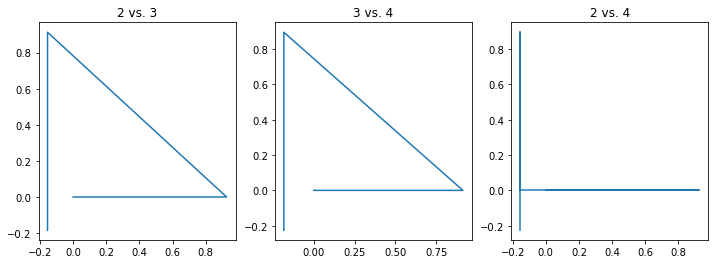

In [457]:
plt.figure(figsize=(12,4))
plt.subplot(1, 3, 1)
plt.plot(eig_vectors_star[:,1], eig_vectors_star[:,2], '-')
plt.title('2 vs. 3')
plt.subplot(1, 3, 2)
plt.plot(eig_vectors_star[:,2], eig_vectors_star[:,3], '-')
plt.title('3 vs. 4')
plt.subplot(1, 3, 3)
plt.plot(eig_vectors_star[:,1], eig_vectors_star[:,3], '-')
plt.title('2 vs. 4')
plt.show()

- 3d-print the drawing of the graph in $R^3$ with vertices at $(f2(i),f3(i),f4(i))$ and edges between neighboring vertices.

In [388]:
from mpl_toolkits.mplot3d import Axes3D

#### Path

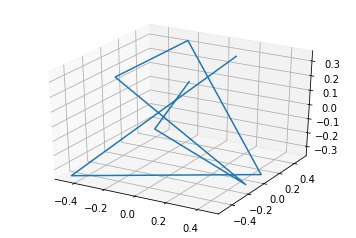

In [392]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(eig_vectors_path[:,1], eig_vectors_path[:,2], eig_vectors_path[:,3])
plt.show()

#### Cycle

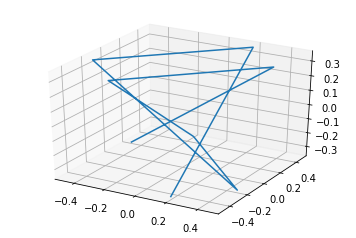

In [393]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(eig_vectors_cycle[:,1], eig_vectors_cycle[:,2], eig_vectors_cycle[:,3])
plt.show()

#### Complete graph

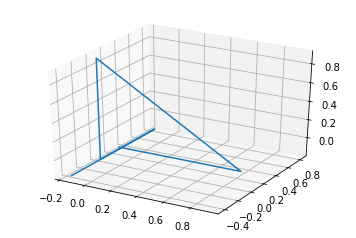

In [394]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(eig_vectors_complete[:,1], eig_vectors_complete[:,2], eig_vectors_complete[:,3])
plt.show()

#### Hypercube

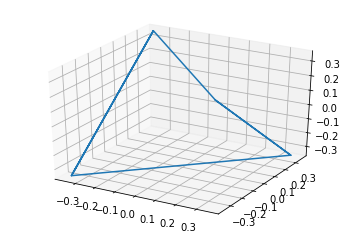

In [389]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(eig_vectors_hcube[:,1], eig_vectors_hcube[:,2], eig_vectors_hcube[:,3])
plt.show()

#### Star

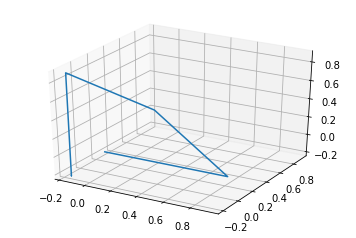

In [458]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(eig_vectors_star[:,1], eig_vectors_star[:,2], eig_vectors_star[:,3])
plt.show()

### Concluding remarks

From lecture we now that laplacian matrix computes some kind of "influence by neighbors".

We have seen very nice pictures of its eigenvectors that remind a Fourier basis a lot. 

Notice that the more $j$, the ordering number of the eigenvalue corresponding to the eigenvector (that is the smaller the corresponding eigenvalue), the simpler the graph representing the vector, which is quite intuitive.

Moreover, the plots of projections of the coordinates of 2nd, 3rd and 4th eigenvectors and their 3d plots give some ideas about the structure of the underlying graph. E.g., we see that respective pictures for cycle are very symmetric (as one might be expecting), as well as pictures for hypercube (super _regular_ - and the hypercube is reguar). Finally, the pictures for complete graph and star are quite similar.

Therefore, we can conclude that eigenvectors of laplacian matrix of a graph can tell us a lot about the structure of the underlying graph.